#Import libraries

In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Conv2D, Dense, Flatten, \
                                    Concatenate, GlobalMaxPooling2D, \
                                    MaxPooling2D, GlobalAveragePooling2D, \
                                    GlobalAveragePooling2D

import matplotlib.pyplot as plt

tf.__version__

'2.10.1'

In [2]:
# print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Import Datasets

In [2]:
# pip install tensorflow-gpu

In [3]:
# !nvidia-smi

Sun Mar  5 15:50:56 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.18                 Driver Version: 531.18       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090 Ti    WDDM | 00000000:01:00.0  On |                  Off |
|  0%   52C    P0              103W / 450W|   1161MiB / 24564MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
train_dir = r"G:\Drive'ım\DataSets\birds\train"
valid_dir = r"G:\Drive'ım\DataSets\birds\valid"
test_dir = r"G:\Drive'ım\DataSets\birds\test"

In [3]:
image_size = (224, 224)
batch_size = 64

train_ds = tf.keras.utils.image_dataset_from_directory( # it return tf.data. In this way we could easily build optimized pipelines.
    directory = train_dir,
    image_size = image_size,
    batch_size = batch_size,
    label_mode = 'int',
    shuffle = True
)

valid_ds = tf.keras.utils.image_dataset_from_directory(
    directory = valid_dir,
    image_size = image_size,
    batch_size = batch_size,
    label_mode = 'int',
    shuffle = False
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    directory = test_dir,
    image_size = image_size,
    batch_size = batch_size,
    label_mode = 'int',
    shuffle = False

)

classes = train_ds.class_names

Found 80085 files belonging to 500 classes.
Found 2500 files belonging to 500 classes.
Found 2500 files belonging to 500 classes.


In [4]:
train_ds = train_ds.cache().prefetch(tf.data.AUTOTUNE)
# GPU training on t batch. Forward pass - Backward pass
# CPU preparing t+1 batch.

In [5]:
def visualize_dataset(dataset: tf.data.Dataset):
  plt.figure(figsize = (24,18))
  for images, labels in dataset.take(1):
    for i in range(64):
      plt.subplot(8, 8 , i+1)
      plt.imshow(images[i].numpy().astype('uint8'))
      plt.title(classes[labels[i].numpy()])
      plt.axis('off')


In [6]:
total_classes = len(classes)
total_classes

500

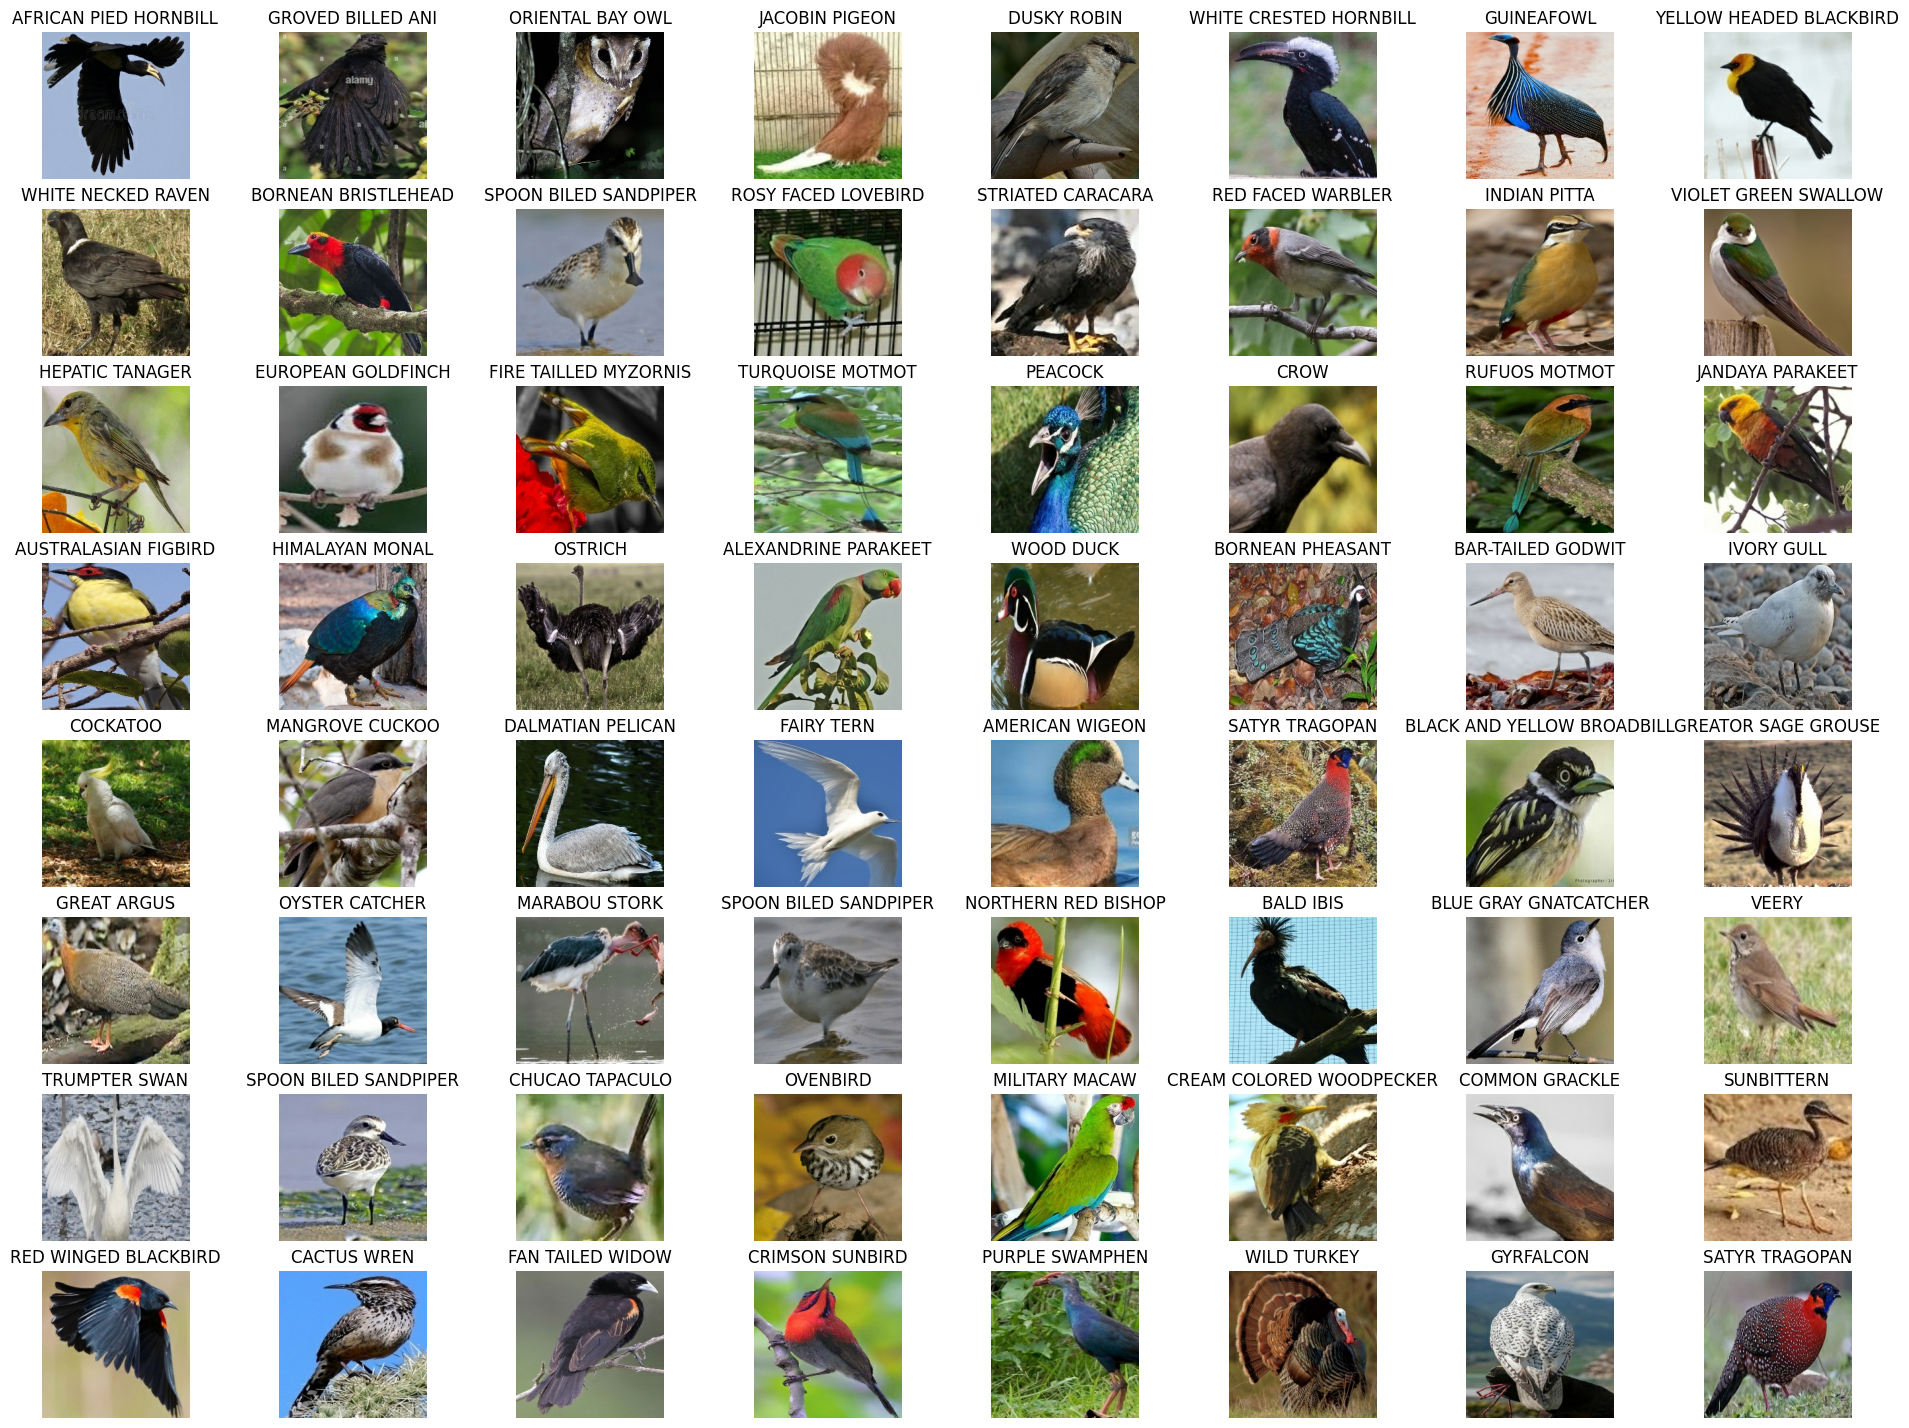

In [7]:
visualize_dataset(train_ds)

# ANN Model

In [9]:
ann_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer((224, 224, 3)),
    tf.keras.layers.Rescaling(1/255.0),


    Flatten(),

    tf.keras.layers.Dense(128 , activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation= 'relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation= 'relu'),
    tf.keras.layers.Dropout(0.1),

    Dense(total_classes, activation = 'softmax')

])

ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 128)               19267712  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2

In [10]:
ann_model.compile(loss = 'sparse_categorical_crossentropy', # Labels integer so we use sparse_categorical_crossentrophy, if we use one hot endcoding labels we should have been use categorical_crossentrophy
                  optimizer = 'adam',
                  metrics = ['acc']
                  )

ann_model.fit(train_ds , epochs = 5, validation_data = valid_ds)

Epoch 1/5
1252/1252 [==============================] - 308s 246ms/step - loss: 6.2935 - acc: 0.0024 - val_loss: 6.2155 - val_acc: 0.0020
Epoch 2/5
1252/1252 [==============================] - 116s 93ms/step - loss: 6.2107 - acc: 0.0031 - val_loss: 6.2171 - val_acc: 0.0020
Epoch 3/5
1252/1252 [==============================] - 116s 93ms/step - loss: 6.2094 - acc: 0.0031 - val_loss: 6.2186 - val_acc: 0.0020
Epoch 4/5
1252/1252 [==============================] - 118s 94ms/step - loss: 6.2090 - acc: 0.0031 - val_loss: 6.2196 - val_acc: 0.0020
Epoch 5/5
1252/1252 [==============================] - 118s 94ms/step - loss: 6.2088 - acc: 0.0031 - val_loss: 6.2204 - val_acc: 0.0020


In [11]:
1/total_classes 

0.002

# Basic CNN

In [11]:
# print(tf.keras.layers.Rescaling(1/255.0)([255]))
# print(tf.keras.layers.Rescaling(1/255.0)([120]))

tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([0.47058827], shape=(1,), dtype=float32)


In [11]:
basic_cnn = tf.keras.Sequential([
    tf.keras.layers.InputLayer((224,224,3)),
    tf.keras.layers.Rescaling(1/255.0),

    Conv2D(16, 3, padding= 'same' , activation= 'relu'),
    MaxPooling2D((3,3)),

    Conv2D(32, 3, padding= 'same' , activation= 'relu'),
    MaxPooling2D((3,3)),

    Conv2D(64, 3, padding= 'same' , activation= 'relu'),
    MaxPooling2D((3,3)),

    Conv2D(128, 3, padding= 'same' , activation= 'relu'),
    MaxPooling2D((3,3)),

    # Flatten(),

    GlobalMaxPooling2D(), # Flatten better. This cause lost too many features.

    Dense(total_classes, activation= None)

])

basic_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        1

In [12]:
basic_cnn.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), # If output activation = None, then we should use this for call tf.nn.sparse_softmax_cross_entropy_with_logits function.
                  optimizer = 'adam',
                  metrics = ['acc']
                  )

basic_cnn.fit(train_ds , epochs = 24, validation_data = valid_ds)

Epoch 1/24
1252/1252 [==============================] - 309s 246ms/step - loss: 5.1017 - acc: 0.0788 - val_loss: 3.5493 - val_acc: 0.2532
Epoch 2/24
1252/1252 [==============================] - 285s 228ms/step - loss: 3.1640 - acc: 0.3293 - val_loss: 2.4382 - val_acc: 0.4524
Epoch 3/24
1252/1252 [==============================] - 285s 227ms/step - loss: 2.4758 - acc: 0.4554 - val_loss: 2.0601 - val_acc: 0.5340
Epoch 4/24
1252/1252 [==============================] - 290s 231ms/step - loss: 2.1117 - acc: 0.5278 - val_loss: 1.8125 - val_acc: 0.5784
Epoch 5/24
1252/1252 [==============================] - 289s 230ms/step - loss: 1.8776 - acc: 0.5750 - val_loss: 1.6842 - val_acc: 0.6104
Epoch 6/24
1252/1252 [==============================] - 287s 229ms/step - loss: 1.7082 - acc: 0.6082 - val_loss: 1.5996 - val_acc: 0.6288
Epoch 7/24
1252/1252 [==============================] - 290s 232ms/step - loss: 1.5827 - acc: 0.6327 - val_loss: 1.5245 - val_acc: 0.6404
Epoch 8/24
1252/1252 [============

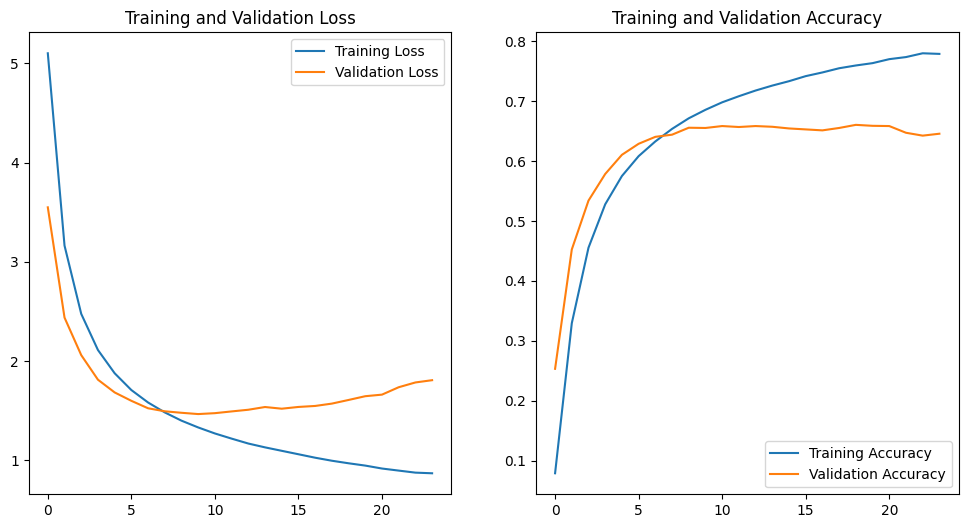

In [21]:
import matplotlib.pyplot as plt

# Train / Validation Losses
train_loss = basic_cnn.history.history['loss']
val_loss = basic_cnn.history.history['val_loss']
train_acc = basic_cnn.history.history['acc']
val_acc = basic_cnn.history.history['val_acc']

# plot
epochs_range = range(24)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

In [23]:
basic_cnn.evaluate(test_ds)

40/40 [==============================] - 3s 84ms/step - loss: 1.5384 - acc: 0.6740


[1.5384269952774048, 0.6740000247955322]

In [24]:
# import psutil
# import os
# import time

# process = psutil.Process(os.getpid())

# while True:
#     print(f"Memory usage: {process.memory_info().rss / 1024 / 1024:.2f} MB")
#     time.sleep(1)
    
#     break

## Usage Checks

In [25]:
# import psutil
# import os
# import time

# process = psutil.Process(os.getpid())

# for i in range(10):
#     print(f"Memory usage: {process.memory_info().rss / 1024 / 1024:.2f} MB")
#     time.sleep(1)

Memory usage: 46368.65 MB
Memory usage: 46368.65 MB
Memory usage: 46368.65 MB
Memory usage: 46368.65 MB
Memory usage: 46368.65 MB
Memory usage: 46368.65 MB
Memory usage: 46368.65 MB
Memory usage: 46368.65 MB
Memory usage: 46368.65 MB
Memory usage: 46368.65 MB


In [21]:
# del ann_model

In [32]:
# vars = [basic_cnn, batch_size, classes, process, test_ds, train_ds, valid_ds, i]
# sizes = {}
# for var in vars:
#     sizes[str(type(var))] = sys.getsizeof(var)

# print(sizes)

{"<class 'keras.engine.sequential.Sequential'>": 48, "<class 'int'>": 28, "<class 'list'>": 4216, "<class 'psutil.Process'>": 48, "<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>": 48, "<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>": 48}


# Skip Connection CNN

In [8]:
from keras.layers import AveragePooling2D
def conv_bn(inputs,
            filters = 16,
            kernel_size = (3,3)):
  
  x = Conv2D(filters, kernel_size, padding= 'same')(inputs)
  x = tf.keras.layers.BatchNormalization()(x) # This can be after than optimizer. But this is also possible.
  x = tf.nn.silu(x) # swish. # mish,... # Bigger then relu but also their costs are more than relu too :)

  return x


def skip_connection(inputs,
                    filters = 16,
                    kernel_size = (3,3)):
  
  x = conv_bn(inputs, filters, kernel_size)
  x = conv_bn(x, filters, kernel_size)

  x = Concatenate()([x, inputs]) # This is the main part for skip_connection.

  return x


def downsampling_conv(inputs,
                      filters = 16,
                      kernel_size = (3,3)):
  
  x = conv_bn(inputs, filters, kernel_size)
  x = conv_bn(x, filters, kernel_size)

  x = AveragePooling2D((3,3))(x)

  return x

In [9]:
input_layer = tf.keras.Input((224, 224, 3)) # We use function api so we cant give inputs as a normal list or tuple. We should use tf.keras.Input()
rescaled_inputs = tf.keras.layers.Rescaling(1/255.0)(input_layer)

x = skip_connection(rescaled_inputs, filters = 16)
x = skip_connection(x, filters = 32)
x = downsampling_conv(x, filters = 32)

x = skip_connection(x, filters = 64)
x = skip_connection(x, filters = 64)
x = downsampling_conv(x, filters = 128)

x = GlobalAveragePooling2D()(x)
x = Dense(total_classes, activation = None)(x)

res_cnn = tf.keras.Model(input_layer, x)
res_cnn.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 16  448         ['rescaling[0][0]']              
                                )                                                                 
                                                                                              

In [10]:
# tf.keras.utils.plot_model(res_cnn, show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [11]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.1,
    patience = 3 , 
    mode = 'min' ,
    verbose = 1 , 
    min_lr = 1e-6
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 7 , 
    mode = 'min' ,
    verbose = 1 , 
    restore_best_weights=True
)

callbacks = [reduce_lr,early_stopping]

res_cnn.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), # If output activation = None, then we should use this for call tf.nn.sparse_softmax_cross_entropy_with_logits function.
                  optimizer = 'adam',
                  metrics = ['acc']
                  )

res_cnn.fit(train_ds , epochs = 24, validation_data = valid_ds, callbacks = callbacks)

Epoch 1/24
1252/1252 [==============================] - 464s 363ms/step - loss: 5.1361 - acc: 0.0605 - val_loss: 4.6454 - val_acc: 0.0936 - lr: 0.0010
Epoch 2/24
1252/1252 [==============================] - 452s 361ms/step - loss: 3.9807 - acc: 0.1838 - val_loss: 3.3906 - val_acc: 0.2636 - lr: 0.0010
Epoch 3/24
1252/1252 [==============================] - 448s 358ms/step - loss: 3.1601 - acc: 0.3179 - val_loss: 2.8155 - val_acc: 0.3564 - lr: 0.0010
Epoch 4/24
1252/1252 [==============================] - 454s 363ms/step - loss: 2.5639 - acc: 0.4299 - val_loss: 2.2065 - val_acc: 0.4768 - lr: 0.0010
Epoch 5/24
1252/1252 [==============================] - 461s 368ms/step - loss: 2.1507 - acc: 0.5084 - val_loss: 1.9767 - val_acc: 0.5384 - lr: 0.0010
Epoch 6/24
1252/1252 [==============================] - 484s 386ms/step - loss: 1.8629 - acc: 0.5667 - val_loss: 1.6902 - val_acc: 0.5928 - lr: 0.0010
Epoch 7/24
1252/1252 [==============================] - 484s 387ms/step - loss: 1.6469 - acc: 

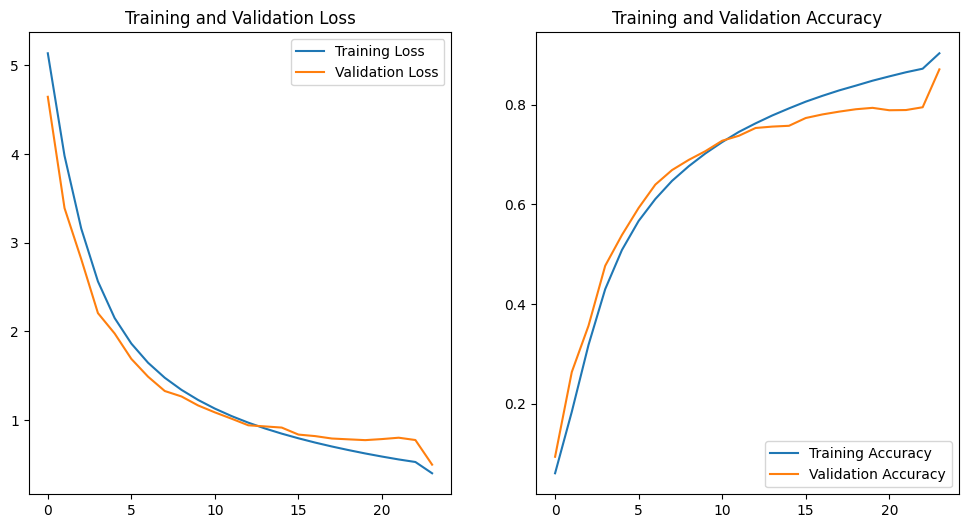

In [12]:
import matplotlib.pyplot as plt

# Train / Val results
train_loss = res_cnn.history.history['loss']
val_loss = res_cnn.history.history['val_loss']
train_acc = res_cnn.history.history['acc']
val_acc = res_cnn.history.history['val_acc']

# plot
epochs_range = range(24)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

In [13]:
res_cnn.evaluate(test_ds)

40/40 [==============================] - 6s 153ms/step - loss: 0.3750 - acc: 0.9040


[0.37503936886787415, 0.9039999842643738]

# DenseNet121 Transfer Learning

In [14]:
# ImageNet dataset.
# Densenet min Input 29x29x3
# InceptionV3 min Input 75x75

input_layer = tf.keras.Input((224, 224, 3))
# We don't use rescaling layer here because DenseNet, Exception, Inception vb. models may have their own preprocessing steps.

from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input

preprocessed_inputs = tf.keras.layers.Lambda(lambda x : preprocess_input(x))(input_layer)

In [15]:
base_model = DenseNet121(
    weights = 'imagenet',
    include_top = False, # If True, its comming whole densenet. Conv blocks + Global Pool + Dense(1000). But we just get only Conv blocks if its False.
    input_tensor = preprocessed_inputs
)

base_model

29084464/29084464 [==============================] - 3s 0us/step


In [16]:
base_model.output # Last layer output

<KerasTensor: shape=(None, 7, 7, 1024) dtype=float32 (created by layer 'relu')>

In [17]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(total_classes)(x) # Activation None now

tl_model = tf.keras.Model(inputs = input_layer,
                          outputs = x,
                          )
tl_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['lambda[0][0]']                 
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']   

In [22]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.1,
    patience = 3 , 
    mode = 'min' ,
    verbose = 1 , 
    min_lr = 1e-6
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 7 , 
    mode = 'min' ,
    verbose = 1 , 
    restore_best_weights=True
)

callbacks = [reduce_lr,early_stopping]

tl_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), # If output activation = None, then we should use this for call tf.nn.sparse_softmax_cross_entropy_with_logits function.
                  optimizer = 'adam',
                  metrics = ['acc']
                  )

tl_model.fit(train_ds , epochs = 24, validation_data = valid_ds, callbacks = callbacks)

Epoch 1/24
1252/1252 [==============================] - 323s 254ms/step - loss: 1.5028 - acc: 0.6857 - val_loss: 0.6384 - val_acc: 0.8316 - lr: 0.0010
Epoch 2/24
1252/1252 [==============================] - 301s 240ms/step - loss: 0.4090 - acc: 0.8927 - val_loss: 0.4396 - val_acc: 0.8824 - lr: 0.0010
Epoch 3/24
1252/1252 [==============================] - 303s 242ms/step - loss: 0.2655 - acc: 0.9276 - val_loss: 0.4218 - val_acc: 0.8796 - lr: 0.0010
Epoch 4/24
1252/1252 [==============================] - 297s 237ms/step - loss: 0.2035 - acc: 0.9421 - val_loss: 0.4459 - val_acc: 0.8868 - lr: 0.0010
Epoch 5/24
1252/1252 [==============================] - 305s 244ms/step - loss: 0.1625 - acc: 0.9516 - val_loss: 0.4443 - val_acc: 0.8896 - lr: 0.0010
Epoch 6/24
1252/1252 [==============================] - 312s 249ms/step - loss: 0.1328 - acc: 0.9600 - val_loss: 0.3389 - val_acc: 0.9264 - lr: 0.0010
Epoch 7/24
1252/1252 [==============================] - 311s 248ms/step - loss: 0.1180 - acc: 

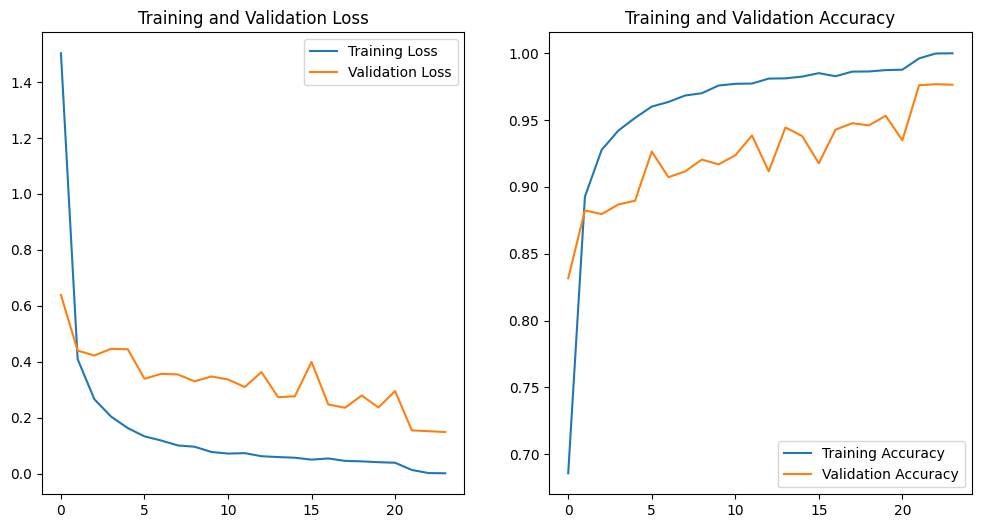

In [24]:
import matplotlib.pyplot as plt

# Train / Val results
train_loss = tl_model.history.history['loss']
val_loss = tl_model.history.history['val_loss']
train_acc = tl_model.history.history['acc']
val_acc = tl_model.history.history['val_acc']

# plot
epochs_range = range(24)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

In [26]:
tl_model.evaluate(test_ds)

40/40 [==============================] - 4s 98ms/step - loss: 0.0314 - acc: 0.9884


[0.03142951801419258, 0.9883999824523926]

In [ ]:
# Perfect !